### 회귀모델
- 회귀(Regression): 두 변수 사이의 상관관계를 분석하는 방법
- 임의의 어떤 숫자(연속적인 값): 주기, 환율, 수량, 부동산, ...
- 내년도 경제 성장률 예측, 배달이 도착할 시간 예측
- 알고리즘: k-최근접 이웃 회귀, 선형 회귀, 다중 회귀 등 

In [2]:
import pandas as pd

In [14]:
df = pd.read_csv('test1_modify.csv')
print(df.shape)
df.head().T



(10886, 15)


,0,1,2,3,4
year,2011.000,2011.000,2011.000,2011.000,2011.000
month,1.000,1.000,1.000,1.000,1.000
hour,0.000,1.000,2.000,3.000,4.000
dayofweek,5.000,5.000,5.000,5.000,5.000
season,1.000,1.000,1.000,1.000,1.000
holiday,0.000,0.000,0.000,0.000,0.000
workingday,0.000,0.000,0.000,0.000,0.000
weather,1.000,1.000,1.000,1.000,1.000
temp,9.840,9.020,9.020,9.840,9.840
atemp,14.395,13.635,13.635,14.395,14.395


In [6]:
df.columns

Index(['Unnamed: 0', 'datetime', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'year', 'month', 'hour', 'dayofweek'],
      dtype='object')

In [8]:
interesting = ['year', 'month', 'hour', 'dayofweek', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count']


In [10]:
df = df[interesting]

In [12]:
df.to_csv('test1_modify.csv', index=False)

In [16]:
feature = ['year', 'month', 'hour', 'dayofweek', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed']
label = 'count'

In [63]:
train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

x_train, y_train = train[feature], train[label]
x_test, y_test = test[feature], test[label]


In [65]:
from sklearn.ensemble import RandomForestRegressor as rf

In [67]:
model = rf()
model.fit(x_train, y_train)

RandomForestRegressor()

In [69]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(train_score, test_score)

0.9920204097392962 0.9265018960265172


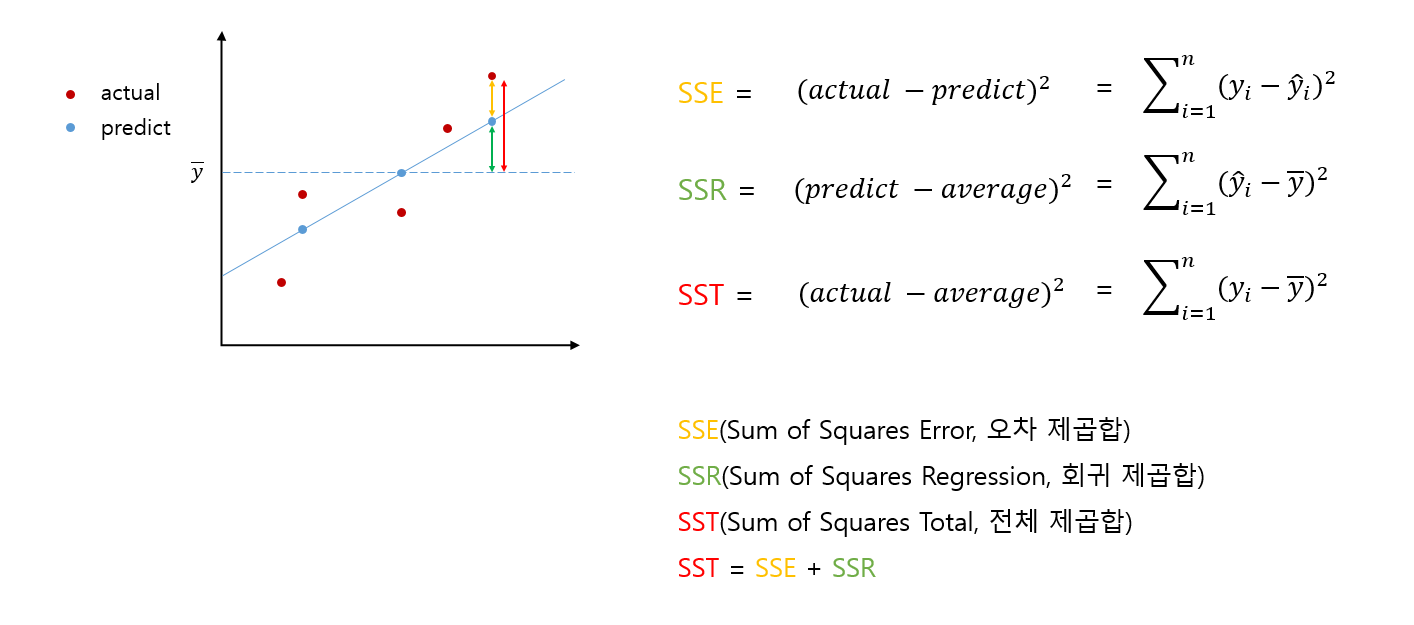

In [37]:
Image('R2.png')

#### 결정계수(coefficient of determination, R-squred, R2)
- 회귀 분석이 얼마나 잘 되었는지 평가하는 지표
- 회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?에 대한 점수
- 회귀에서는 예측하는 값이나 타깃이 임의의 수치이므로 정확한 숫자를 예측하는 서은 거의 불가능함
- R2는 0~1 사이의 값을 갖고, 1에 가까울수록 예측력이 좋다고 판단-> 데이터를 잘 설명하는 모델
- 1 -> 100%의 정답을 맞춘다. -> 오차가 없음

#### R2 공식
- R2 = 1 - SSE / SST
- SSE: 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함
- SST: 타깃과 타깃의 평균의 차이를 제곱하여 더한 값으로 나눔
- 타깃의 평균 정도를 예측하는 수준이라면 R2는 0에(분자가 0에 가까워 지기 때문에) 가까워짐
- 예측이 타깃에 가까워지면 (분자와 분모가 비슷하면) 1에 가까운 값이 됨

#### 과대적합(Over-fitting)과 과소적합(Under-fitting)
- 과대적합 : 샘플에 예측값이 너무 과하게 적합되어 있는 상태
- 과소적합 : 샘플에 예측값이 너무 적게 적합되어 있는 상태

In [41]:
from sklearn.tree import DecisionTreeRegressor as dt

In [51]:
model_dt = dt()
model_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [53]:
train_score = model_dt.score(x_train, y_train)
test_score = model_dt.score(x_test, y_test)

print(train_score, test_score)

# 일반화의 실패

0.9999996572093738 0.8592438724291457


#### 회귀 문제에서 다양한 평가지표들
- R(Root), M(Mean), S(Squared), L(Log), P(Percentile), A(Absolute), E(Error)
- MAE : 오차의 절대값을 씌우고 평균
- MSE : 오차를 제곱하여 평균
- MAPE : 오차의 비율을 절대값 씌우고 평균
- RMSE : 오차를 제곱해서 평균한 것의 제곱근
- RMSLE : 로그 오차를 제곱하여 평균한 것의 제곱근 적용
- 그 외에 평가지표들: Adj.R2, AIC, BIC 등이 더 있다 

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [71]:
print(mean_absolute_error(y_test, model.predict(x_test)))
print(mean_squared_error(y_test, model.predict(x_test)))
print(r2_score(y_test, model.predict(x_test)))

31.59258148080103
2420.072839000903
0.9265018960265172


#### 로그오차 예시
- 경우1) 정답: 1, 예측값: 2
- 경우2) 정답: 1001, 예측값: 1002


In [76]:
import numpy as np

err1 = np.log(2) - np.log(1)
err2 = np.log(1002) - np.log(1001)

print(err1, err2)

0.6931471805599453 0.0009985023295895346


#### 평가지표의 값이 높고 낮음의 의미를 시각화

In [87]:
len(model.predict(x_test))

5443

In [81]:
y_test

0        40
1        13
2         1
3         3
4        14
       ... 
5438    237
5439    562
5440    336
5441    168
5442     88
Name: count, Length: 5443, dtype: int64

In [89]:
import matplotlib.pyplot as plt

C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='count'>

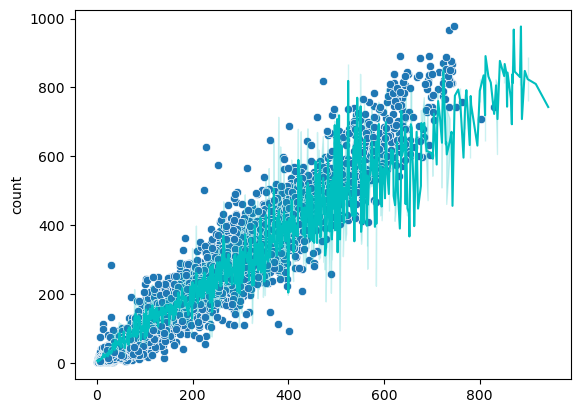

In [113]:
sns.scatterplot(x=model.predict(x_test), y=y_test)
sns.lineplot(x=model_dt.predict(x_test),y=y_test, c='c')

In [123]:
for_plot = pd.DataFrame()

for_plot['train_actual'] = y_train
for_plot['train_predict'] = model.predict(x_train)
for_plot['test_actual'] = y_test
for_plot['test_predict'] = model.predict(x_test)

for_plot.head()

# randomforesst는 완벽하게 학습하지 않는다
# 과적합문제 

,train_actual,train_predict,test_actual,test_predict
0,16,22.71,40,23.43
1,32,27.18,13,14.90
2,1,2.64,1,3.90
3,2,3.51,3,34.62
4,8,28.20,14,52.86


0.9920204097392962


<Axes: xlabel='test_actual', ylabel='test_predict'>

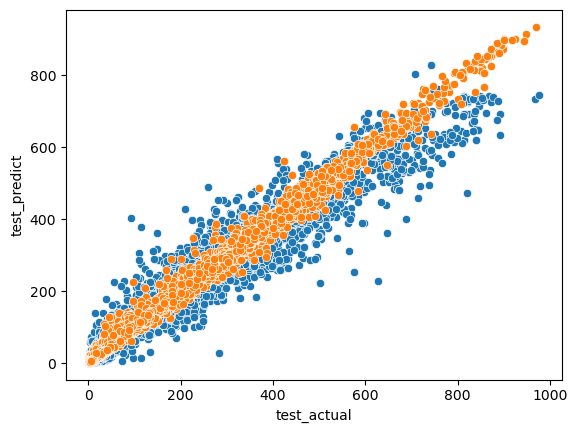

In [139]:
print(model.score(x_train, y_train))
sns.scatterplot(data=for_plot, x='test_actual', y='test_predict')
sns.scatterplot(data=for_plot, x='train_actual', y='train_predict')

0.9265018960265172


<Axes: xlabel='test_actual', ylabel='test_predict'>

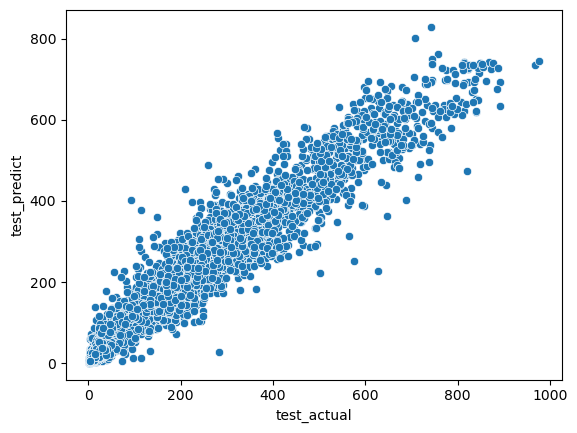

In [135]:
print(model.score(x_test, y_test))
sns.scatterplot(data=for_plot, x='test_actual', y='test_predict')

In [141]:
# 일반화에 실패한 평가지표 시각화
for_plot_dt = pd.DataFrame()

for_plot_dt['train_actual'] = y_train
for_plot_dt['train_predict'] = model_dt.predict(x_train)
for_plot_dt['test_actual'] = y_test
for_plot_dt['test_predict'] = model_dt.predict(x_test)

for_plot_dt.head()

,train_actual,train_predict,test_actual,test_predict
0,16,16.0,40,16.0
1,32,32.0,13,18.0
2,1,1.0,1,2.0
3,2,2.0,3,3.0
4,8,8.0,14,75.0


0.9920204097392962


<Axes: xlabel='test_actual', ylabel='test_predict'>

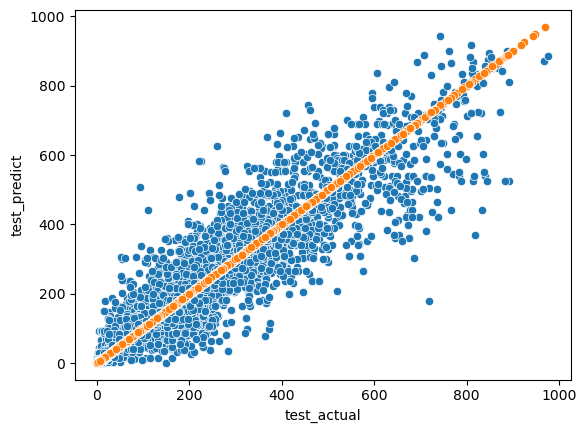

In [145]:
print(model.score(x_train, y_train))
sns.scatterplot(data=for_plot_dt, x='test_actual', y='test_predict')
sns.scatterplot(data=for_plot_dt, x='train_actual', y='train_predict')

#### feature selection
- 과적합을 방지하고, 일반화를 달성하기 위해 사용하는 방법
- 차원축소와 차이점????

- 방법론 : filter, wrapper, embed
- embed 방식이 우수하다고 생각됨(그러나 케바케)

#### filter 방식
- 기초통계량을 기반으로 feature 간의 관계에서 높은 상관 계수를 가지는 feature를 사용하는 방법
- 예: 표준편차가 0에 가까우면 해당 feature를 삭제한다
- IOT Sensor data, Smart Factory쪽 센서 문제에서 종종 사용

In [153]:
df.describe().T.sort_values(by='std')['std']

holiday         0.166599
workingday      0.466159
year            0.500019
weather         0.633839
season          1.116174
dayofweek       2.004585
month           3.444373
hour            6.915838
temp            7.791590
windspeed       8.164537
atemp           8.474601
humidity       19.245033
casual         49.960477
registered    151.039033
count         181.144454
Name: std, dtype: float64

#### Wrapper
- foward Selection(전진 선택), Backward Elimination(후방제거), Stepwirse Selection(단계별 선택)
- feature 조합별로 평가지표 점수를 확인해서 점수가 가장 좋은 조합을 찾아내는 방식
- 노가다.

In [156]:
df.columns

Index(['year', 'month', 'hour', 'dayofweek', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [182]:
features = ['year', 'month', 'hour', 'dayofweek', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed']
label = 'count'

In [184]:
train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()
x_train, y_train = train[feature], train[label]
x_test, y_test = test[feature], test[label]


model = rf()
model.fit(x_train, y_train)

# train_score = model.score(x_train, y_train)
# test_score = model.score(x_test, y_test)

# print(train_score, test_score)

RandomForestRegressor()

In [180]:
from sklearn.feature_selection import RFE # Recursive Feature Elimination

In [186]:
selector = RFE(model)
selector.fit(x_train, y_train)

RFE(estimator=RandomForestRegressor())

In [188]:
selector.ranking_

array([1, 1, 1, 1, 6, 7, 2, 4, 1, 1, 3, 5])

In [192]:
ref_df = pd.DataFrame()
ref_df['feature'] = features
ref_df['rank'] = selector.ranking_
ref_df.sort_values(by='rank')

,feature,rank
0,year,1
1,month,1
2,hour,1
3,dayofweek,1
8,temp,1
9,atemp,1
6,workingday,2
10,humidity,3
7,weather,4
11,windspeed,5


#### **Embed**
- 알고리즘 중에서 각 feature들이 의사결정에 사용된 정도가 들어있는 경우
- Tree 계열이나 Regularizer가 내부에 있는 경우
- 알고리즘의 공식문서에 Lasso, L1표현이 있는 경우 

In [197]:
model.feature_importances_

array([0.06927774, 0.04301032, 0.60828152, 0.04760733, 0.00910967,
       0.00185017, 0.05082391, 0.0160092 , 0.05189448, 0.0640287 ,
       0.02802423, 0.01008275])

In [207]:
fi_df = pd.DataFrame()

fi_df['feature'] = features
fi_df['importances'] = model.feature_importances_
fi_df = fi_df.sort_values(by='importances')
fi_df

,feature,importances
5,holiday,0.001850
4,season,0.009110
11,windspeed,0.010083
7,weather,0.016009
10,humidity,0.028024
1,month,0.043010
3,dayofweek,0.047607
6,workingday,0.050824
8,temp,0.051894
9,atemp,0.064029


<Axes: xlabel='importances', ylabel='feature'>

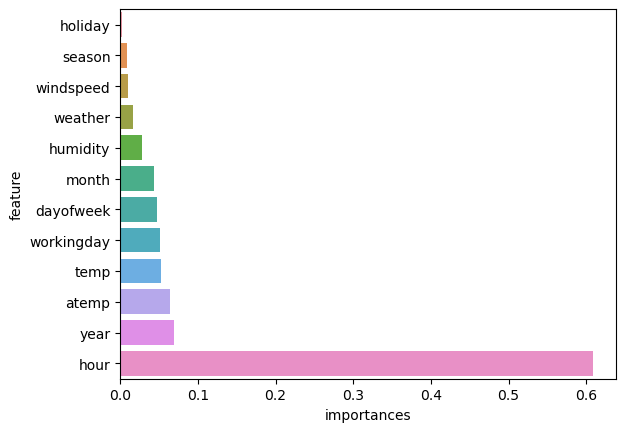

In [209]:
sns.barplot(data=fi_df, x='importances', y='feature')